In [215]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [216]:
# データベースに接続
conn = sqlite3.connect('/Users/hayakawafutaba/Lecture/DSPR/DS_Pro/Scraping/weather_data.db')
# データをPandas DataFrameに読み込む
temperature_data = pd.read_sql_query('SELECT * FROM temperature', conn)
pressure_data = pd.read_sql_query('SELECT * FROM pressure', conn)

# データベースをクローズ
conn.close()

In [217]:
# データベースに接続
conn1 = sqlite3.connect('/Users/hayakawafutaba/Lecture/DSPR/DS_Pro/local/local.db')

# データをPandas DataFrameに読み込む
local_data = pd.read_sql_query('SELECT * FROM sleep_data', conn1)

# データベースをクローズ
conn1.close()

# データの確認（オプション）
print(local_data.head())

     日付  睡眠時間
0  12/1     8
1  12/2     6
2  12/3     7
3  12/4     5
4  12/5     7


In [218]:
import matplotlib.pyplot as plt

In [219]:
print(pressure_data.columns)


Index(['date', 'pressure'], dtype='object')


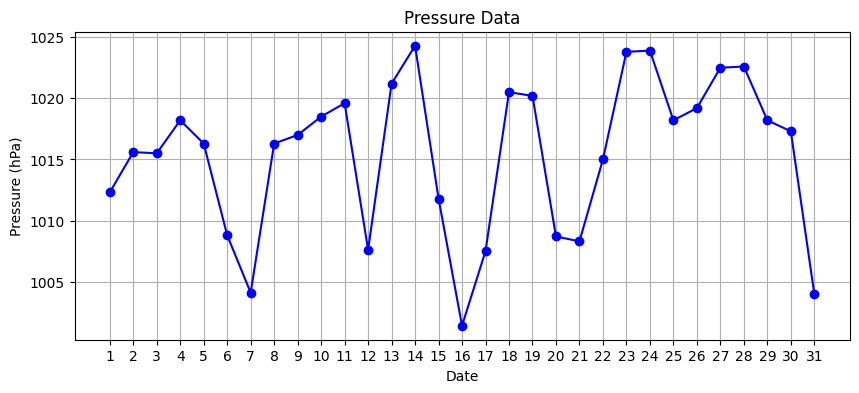

In [220]:
pressure_data['pressure'] = pressure_data['pressure'].str.replace(' hPa', '').astype(float)

# プロットの作成
plt.figure(figsize=(10, 4))
plt.plot(pressure_data['date'], pressure_data['pressure'], marker='o', color='blue')
plt.title('Pressure Data')
plt.xlabel('Date')
plt.ylabel('Pressure (hPa)')
plt.grid(True)
plt.show()



In [221]:


# 数値部分のみを抽出しfloat型に変換
temperature_data['Value'] = temperature_data['Value'].str.extract(r'([-+]?\d*\.?\d+)').astype(float)

# 'Date'をx軸にして、'Value'列を時系列でプロット
plt.figure(figsize=(10, 4))
plt.plot(temperature_data['Date'], temperature_data['Value'], marker='o', color='red')
plt.title('Temperature Data ')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


KeyError: 'Value'

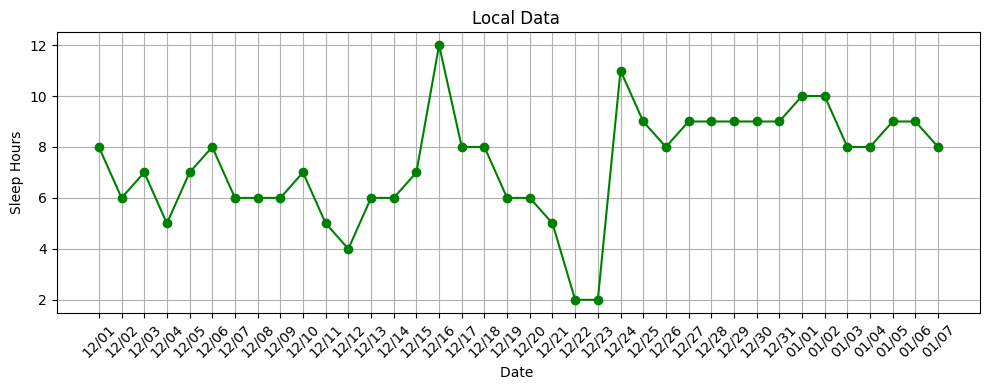

In [ ]:

local_data['日付'] = pd.to_datetime(local_data['日付'], format='%m/%d').dt.strftime('%m/%d')

# データをプロット
plt.figure(figsize=(10, 4))
plt.plot(local_data['日付'], local_data['睡眠時間'], marker='o', linestyle='-', color='green')
plt.title('Local Data ')
plt.xlabel('Date ')
plt.ylabel('Sleep Hours')
plt.xticks(rotation=45)  
plt.grid(True)
plt.tight_layout()  


In [ ]:
# 各データセットの列のデータ型を確認
print("Data types in temperature_data:")
print(temperature_data.dtypes)

print("\nData types in pressure_data:")
print(pressure_data.dtypes)

print("\nData types in local_data:")
print(local_data.dtypes)

Data types in temperature_data:
Date       int64
Value    float64
dtype: object

Data types in pressure_data:
Date       int64
Value    float64
dtype: object

Data types in local_data:
日付      object
睡眠時間     int64
dtype: object


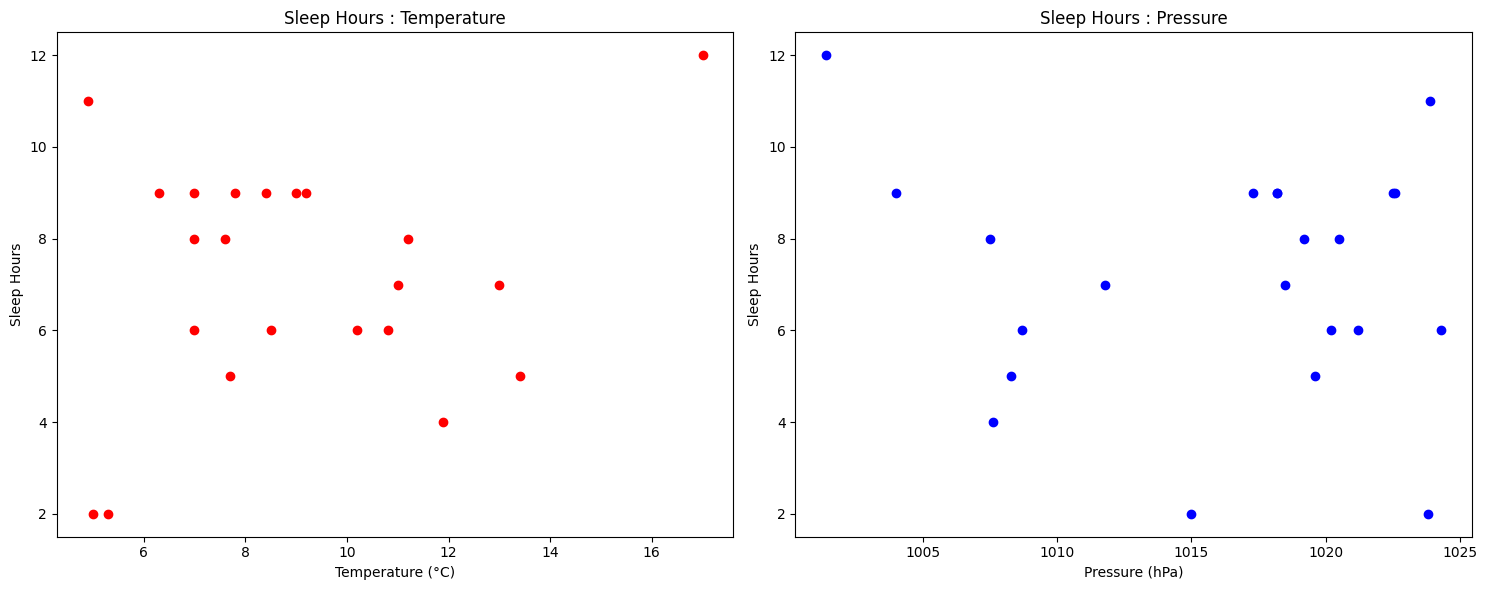

In [ ]:

merged_data.rename(columns={'Value_x': 'Temperature', 'Value_y': 'Pressure'}, inplace=True)

# 散布図を作成
plt.figure(figsize=(15, 6))

# 睡眠時間:気温の散布図
plt.subplot(1, 2, 1)
plt.scatter(merged_data['Temperature'], merged_data['睡眠時間'], color='red')
plt.title('Sleep Hours : Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Sleep Hours')

# 睡眠時間:気圧の散布図
plt.subplot(1, 2, 2)
plt.scatter(merged_data['Pressure'], merged_data['睡眠時間'], color='blue')
plt.title('Sleep Hours : Pressure')
plt.xlabel('Pressure (hPa)')
plt.ylabel('Sleep Hours')

plt.tight_layout()  # グラフのレイアウトを調整
plt.show()


In [ ]:
correlation_temp = full_data['睡眠時間'].corr(full_data['Temperature'])
correlation_pressure = full_data['睡眠時間'].corr(full_data['Pressure'])
print(f"Correlation between Sleep Hours and Temperature: {correlation_temp}")
print(f"Correlation between Sleep Hours and Pressure: {correlation_pressure}")


Correlation between Sleep Hours and Temperature: 0.2002906843050565
Correlation between Sleep Hours and Pressure: -0.10643780063651831


/Users/hayakawafutaba/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30561 (\N{CJK UNIFIED IDEOGRAPH-7761}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hayakawafutaba/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30496 (\N{CJK UNIFIED IDEOGRAPH-7720}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hayakawafutaba/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hayakawafutaba/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


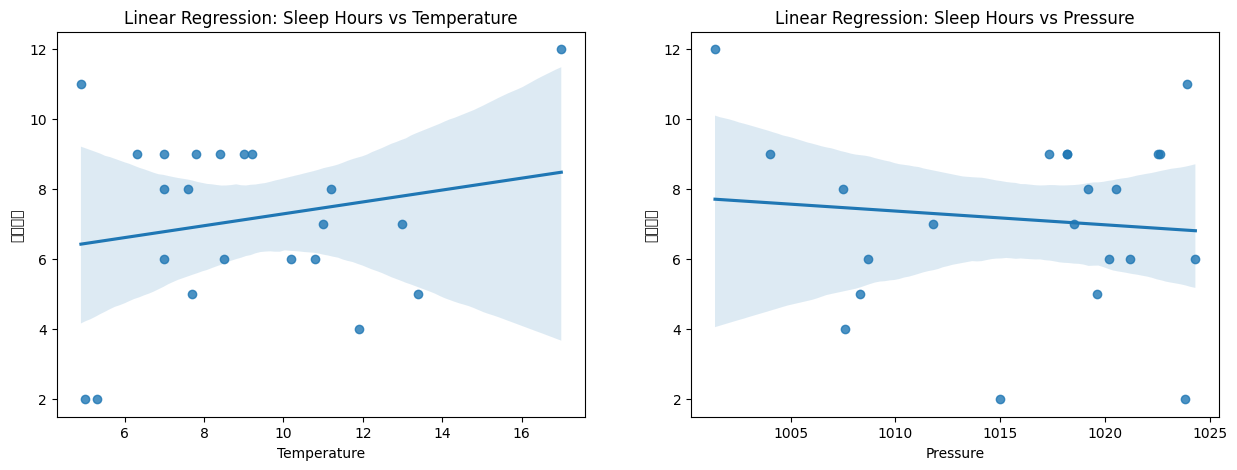

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.regplot(data=full_data, x='Temperature', y='睡眠時間')
plt.title('Linear Regression: Sleep Hours vs Temperature')

plt.subplot(1, 2, 2)
sns.regplot(data=full_data, x='Pressure', y='睡眠時間')
plt.title('Linear Regression: Sleep Hours vs Pressure')
plt.show()


考察
　睡眠時間と気温には正の関係がわかる。つまり、気温が高い日は睡眠時間が長くなる傾向があることを意味する。この関係は弱いが（相関係数が0.20程度）、存在する可能性がある。
　睡眠時間と気圧には負の関係がわかる（相関係数が-0.10程度）。よって気圧が高い日には睡眠時間が短くなる傾向があることを意味する可能性があるが、関係は非常に弱い。
相関係数が+0.20と-0.10であるため、気温と気圧のいずれも睡眠時間に大きな影響を与えているとはいえない。
　これらの結果から、気温と気圧が睡眠時間に影響を与える可能性があることがわかるが、影響の大きさや方向性は非常に限定的だとわかる。また、他の要因（日照時間、生活リズム、個人の健康状態など）も睡眠時間に影響を与えている可能性が高いと考える。このため、気温や気圧と睡眠時間の関連性を確かめるためには、より多くのデータを集めたり、他の要因も考える必要だと考える。